In [5]:
import pandas as pd

In [6]:
from google.colab import files
load=files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [7]:
df=pd.read_csv('IMDB Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
#Convertimos a numero la variable categorica sentiment
df['sentiment']=df['sentiment'].map(dict(positive=1,negative=0))
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [9]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
#Convertimos la columna de sentimiento en un numpy array

label=df['sentiment'].to_numpy()

type(label)

numpy.ndarray

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Preprocesamiento

In [14]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

#Preprocesamiento
#Primero excluimos de la lista de stopwords las palabras no y not

stopwords_list=stopwords.words('english')
stopwords_list=[i for i in stopwords_list if i not in ['no','not']]

#Definimos la funcion para preprocesar el dataset

def preprocessing(data):
  corpus=[]
  for i in range(len(data)):

    #borramos la urls
    tweet= re.sub(r'http\S+',' ',data[i]) # links

    #borrar html tags
    tweet = re.sub(r'<.*?>', ' ', tweet) # tags
    tweet = re.sub('&\w+([-.]\w+)*', ' ', tweet) # colorcodes

    # borrar digitos
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = re.sub('@\w+([-.]\w+)*', ' ', tweet) # mentions

    #borrar emoticones
    emojis=re.compile(
    "[" +
    u"\U0001F600-\U0001F64F" +  # emoticones
    u"\U0001F300-\U0001F5FF" +  # simbolos y pictogramas
    u"\U0001F680-\U0001F6FF" +  # simbolos de transport y mapas
    u"\U0001F1E0-\U0001F1FF" +  # flags (iOS)
    "]+",
    flags=re.UNICODE)

    tweet= emojis.sub(r'', tweet) #Elimino emoticones

    #elimino hashtags
    tweet = re.sub(r'#\w+', ' ', tweet) # hashtags
    tweet = re.sub('[^a-zA-Z]', ' ', tweet) # any characters other than alphabets

    #hago todo minuscula
    tweet = tweet.lower()

    #lematizacion (primero de debe ejecutar un algoritmo de Part of Speech para que etiquete las palabras si no se puede confundir por ej (traje verbo y ropa))
    tweet_list=tweet.split()

    lemma = WordNetLemmatizer()
    tweet_list_lemma= [lemma.lemmatize(i) for i in tweet_list]

    #stopwords

    tweet_list_stopwords=[i for i in tweet_list_lemma if i not in stopwords_list]

    tweet= ' '.join(tweet_list_stopwords)

    #Agrego el tweet ya preprocesado a la lista

    corpus.append(tweet)


  return corpus


In [15]:
review= preprocessing(df['review'])


In [16]:
#Dividimos la columna en Train y Test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(review,label,test_size=0.2,stratify=label,random_state=42)

In [17]:
# Convertimos el texto en secuencia de numeros

from tensorflow.keras.preprocessing.text import Tokenizer

#Primero tokenizamos y creamos indices a las palabras
token=Tokenizer()

token.fit_on_texts(x_train)


In [18]:
#Cantidad de palabras indexadas

size_wordindex=len(token.word_index)+1
size_wordindex

81336

In [19]:
#aplicamos la conversion en base a los indices

train_sequences=token.texts_to_sequences(x_train)

valid_sequences=token.texts_to_sequences(x_test)

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Aplicamos padding al final de la secuencia (Post) para limitar la longitud de la entrada

maxlen=100

x_train= pad_sequences(train_sequences,maxlen=maxlen,padding='post')
x_test= pad_sequences(valid_sequences,maxlen=maxlen,padding='post')




In [21]:
x_train

array([[ 908,   50, 1140, ...,    0,    0,    0],
       [ 169,  152,    1, ...,    0,    0,    0],
       [ 492, 4111,   15, ...,    0,    0,    0],
       ...,
       [   2,  336,    8, ...,    0,    0,    0],
       [ 127, 1004,    1, ...,    0,    0,    0],
       [   1, 1263,  214, ...,    0,    0,    0]], dtype=int32)

In [22]:
x_train.shape

(40000, 100)

# Modelo Neuronal Convuncional

In [23]:
#Construimos el modelo neuronal convucional

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D

vec_size=200

cnn=Sequential()



cnn.add(Embedding(input_dim=size_wordindex,output_dim=vec_size,input_length=maxlen,trainable=False))

cnn.add(Conv1D(filters=32,kernel_size=8,activation='relu'))
cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.5))

cnn.add(Dense(32,activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(16,activation = 'relu'))

cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation='sigmoid'))






In [24]:
#Compilamos el modelo
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
#Entrenamos el modelo
cnn_history= cnn.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1250/1250 [==============================] - 52s 40ms/step - loss: 0.6368 - accuracy: 0.6249 - val_loss: 0.6056 - val_accuracy: 0.6923
Epoch 2/15
1250/1250 [==============================] - 51s 41ms/step - loss: 0.5575 - accuracy: 0.7106 - val_loss: 0.5701 - val_accuracy: 0.7166
Epoch 3/15
1250/1250 [==============================] - 51s 41ms/step - loss: 0.5112 - accuracy: 0.7458 - val_loss: 0.5479 - val_accuracy: 0.7339
Epoch 4/15
1250/1250 [==============================] - 48s 39ms/step - loss: 0.4779 - accuracy: 0.7677 - val_loss: 0.5419 - val_accuracy: 0.7278
Epoch 5/15
1250/1250 [==============================] - 51s 41ms/step - loss: 0.4504 - accuracy: 0.7858 - val_loss: 0.5383 - val_accuracy: 0.7271
Epoch 6/15
1250/1250 [==============================] - 50s 40ms/step - loss: 0.4286 - accuracy: 0.7990 - val_loss: 0.5221 - val_accuracy: 0.7486
Epoch 7/15
1250/1250 [==============================] - 51s 40ms/step - loss: 0.4047 - accuracy: 0.8119 - val_loss: 0.5521 -

In [26]:
#Guardamos el modelo en un archivo pkl (wb representa que es en modo de escritura binaria)

import pickle

#with open ('cnn_sentiment_analysis.pkl','wb') as f:
  #pickle.dump(cnn,f)  --> Esta forma de hacerlo te cierra directamente el archivo (por lo tanto es mas recomendado usar el bloque with as)

f = open("cnn_sentiment_analysis.pkl", "wb")

pickle.dump(cnn, f)

f.close()

In [27]:
#Evaluamos en el test
score=cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.5380 - accuracy: 0.7123


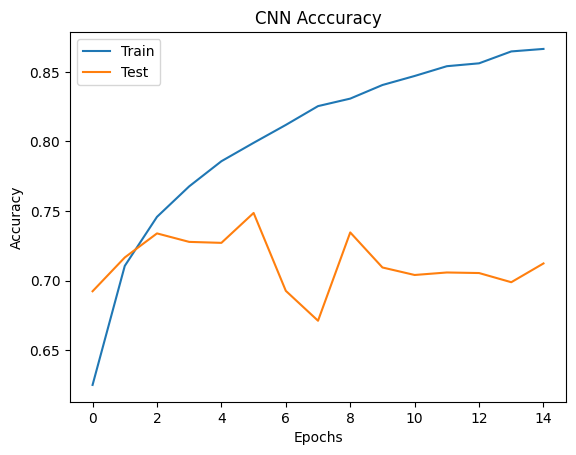

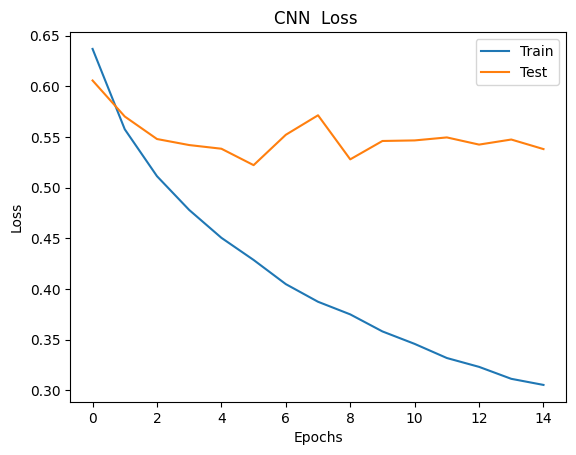

In [28]:
#Generamos las graficas de loss y accuracy
import  matplotlib.pyplot as plt

plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Acccuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='best')
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title("CNN  Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()



# Modelo LSTM

In [29]:
from keras.layers import LSTM
vec_size = 300
lstm =Sequential()

lstm.add(Embedding(input_dim = size_wordindex, output_dim = vec_size,input_length=maxlen,trainable = False))

lstm.add(LSTM(units=200,dropout=0.20))
lstm.add(Dense(1,activation='sigmoid'))


In [30]:
lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
lstm_history = lstm.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1250/1250 [==============================] - 403s 321ms/step - loss: 0.6882 - accuracy: 0.5343 - val_loss: 0.6843 - val_accuracy: 0.5438
Epoch 2/15
1250/1250 [==============================] - 399s 320ms/step - loss: 0.6729 - accuracy: 0.5627 - val_loss: 0.6456 - val_accuracy: 0.5767
Epoch 3/15
1250/1250 [==============================] - 389s 311ms/step - loss: 0.6674 - accuracy: 0.5915 - val_loss: 0.6565 - val_accuracy: 0.6376
Epoch 4/15
1250/1250 [==============================] - 401s 321ms/step - loss: 0.6609 - accuracy: 0.6089 - val_loss: 0.6802 - val_accuracy: 0.5466
Epoch 5/15
1250/1250 [==============================] - 396s 317ms/step - loss: 0.6563 - accuracy: 0.5959 - val_loss: 0.5813 - val_accuracy: 0.7106
Epoch 6/15
1250/1250 [==============================] - 399s 319ms/step - loss: 0.5535 - accuracy: 0.7206 - val_loss: 0.5210 - val_accuracy: 0.7490
Epoch 7/15
1250/1250 [==============================] - 397s 317ms/step - loss: 0.5175 - accuracy: 0.7425 - val_

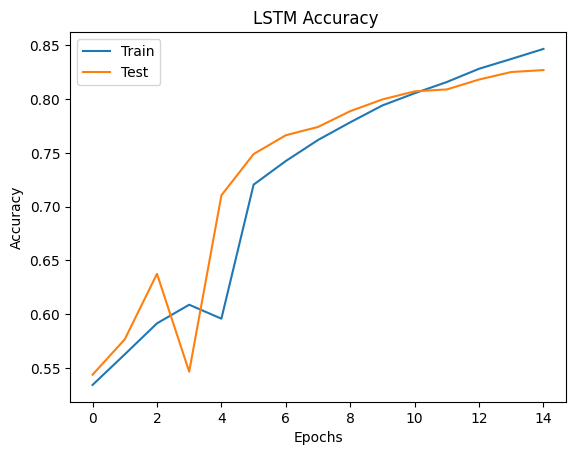

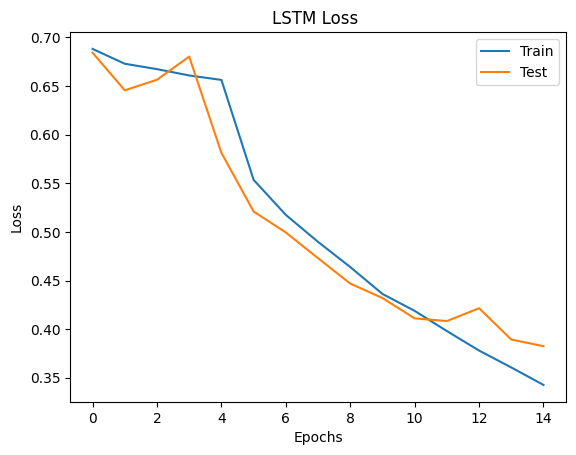

In [35]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title("LSTM Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title("LSTM Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

In [36]:
import pickle
with open ("lstm_sentiment_analysis.pkl",'wb') as f:
    pickle.dump(lstm,f)

In [37]:
score_lstm = lstm.evaluate(x_test,y_test)

313/313 [==============================] - 32s 104ms/step - loss: 0.3825 - accuracy: 0.8271


# Bidirectional LSTM

In [38]:
from tensorflow.keras.layers import Bidirectional

vec_size = 200
bi_lstm =Sequential()

bi_lstm.add(Embedding(input_dim = size_wordindex, output_dim = vec_size,input_length=maxlen,trainable = False))

bi_lstm.add(Bidirectional(LSTM(200, dropout=0.4, recurrent_dropout=0.4)))
bi_lstm.add(Dense(1,activation='sigmoid'))

In [39]:
bi_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
#colocar 30 en epochs, lo corri con 1 por que no daba el procesamiento
bi_lstm_history = bi_lstm.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test))

1250/1250 [==============================] - 1484s 1s/step - loss: 0.6690 - accuracy: 0.5880 - val_loss: 0.6312 - val_accuracy: 0.6575


In [41]:
with open ("bi_lstm.pkl",'wb') as f:
    pickle.dump(bi_lstm,f)

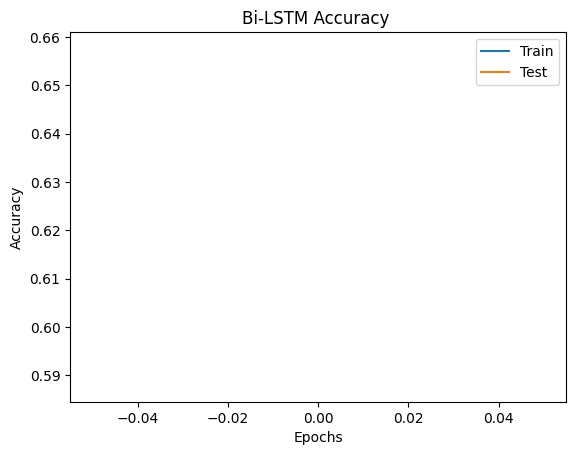

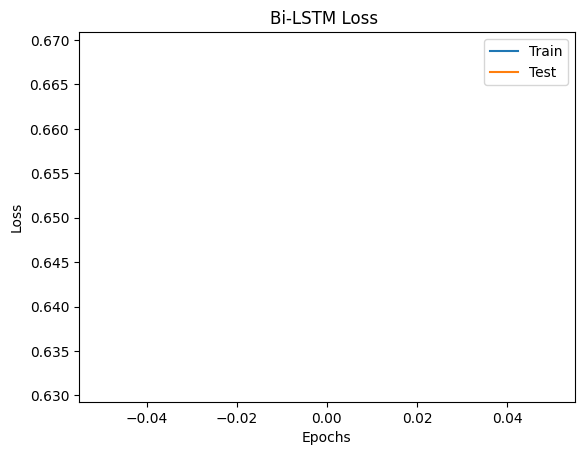

In [42]:
plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.title("Bi-LSTM Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.title("Bi-LSTM Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

In [44]:
score_bilstm = bi_lstm.evaluate(x_test,y_test)

313/313 [==============================] - 53s 169ms/step - loss: 0.6312 - accuracy: 0.6575


# ROC AUC

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

#Primero aplanamos las matrices de predicciones para convertirlas en listas
pred_prob_cnn = cnn.predict(x_test).ravel()
pred_prob_lstm = lstm.predict(x_test).ravel()
pred_prob_bilstm = bi_lstm.predict(x_test).ravel()



313/313 [==============================] - 56s 176ms/step


In [47]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_cnn , pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test,pred_prob_lstm , pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_test,pred_prob_bilstm , pos_label=1)

auc1 = auc(fpr1,tpr1)
auc2 = auc(fpr2,tpr2)
auc3 = auc(fpr3,tpr3)

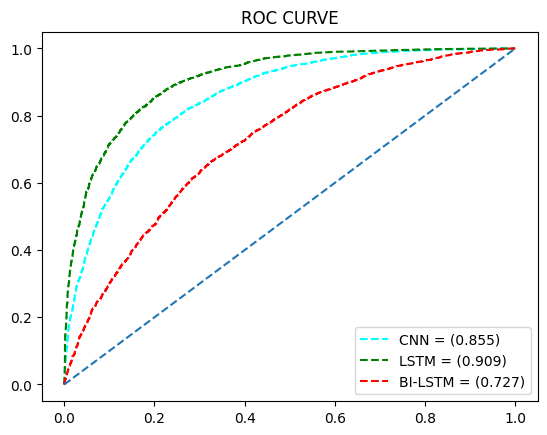

In [48]:
plt.plot(fpr1,tpr1,linestyle='--',color='cyan',label='CNN = (%.3f)'%auc1)
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='LSTM = (%.3f)'%auc2)
plt.plot(fpr3, tpr3,linestyle='--',color='red',label='BI-LSTM = (%.3f)'%auc3)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC CURVE")
plt.legend()